In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# New Section

In [2]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bb= pd.read_csv('/content/drive/MyDrive/DS-ML/EV_market segmentation/Indian automoble buying behavour study 1.0.csv')

In [ ]:
bb.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
bb[bb['Make']=='SUV']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
10,35,Salaried,Married,Post Graduate,4,No,No,Yes,1300000,700000,2000000,SUV,1600000
22,36,Business,Married,Graduate,3,No,No,Yes,1400000,1000000,2400000,SUV,1600000
25,35,Salaried,Married,Graduate,2,No,No,Yes,1800000,1100000,2900000,SUV,1600000
29,36,Salaried,Married,Post Graduate,2,No,No,Yes,1800000,900000,2700000,SUV,1600000
35,42,Salaried,Married,Post Graduate,3,No,No,Yes,2400000,1300000,3700000,SUV,1600000
38,30,Business,Single,Post Graduate,0,No,No,No,1400000,0,1400000,SUV,1600000
42,32,Salaried,Married,Graduate,0,No,No,Yes,1600000,800000,2400000,SUV,1600000
51,49,Salaried,Married,Post Graduate,3,No,No,Yes,2500000,1800000,4300000,SUV,1600000
52,44,Salaried,Married,Post Graduate,4,No,No,No,2700000,0,2700000,SUV,1600000


<AxesSubplot:xlabel='Age', ylabel='count'>

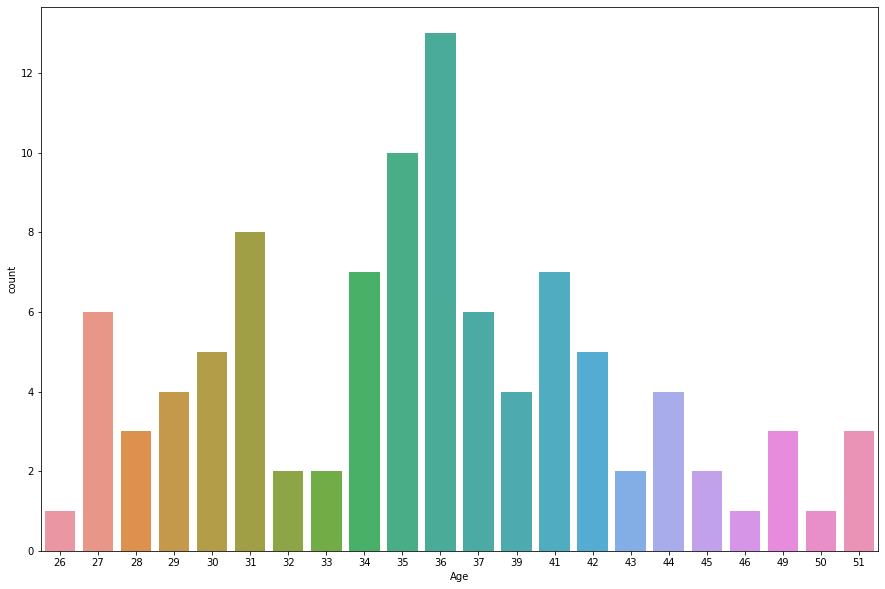

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(data=bb,x='Age')

In [ ]:
plt.subplots(figsize=(12,6))
sns.histplot(data=bb,x='Total Salary')

NameError: ignored

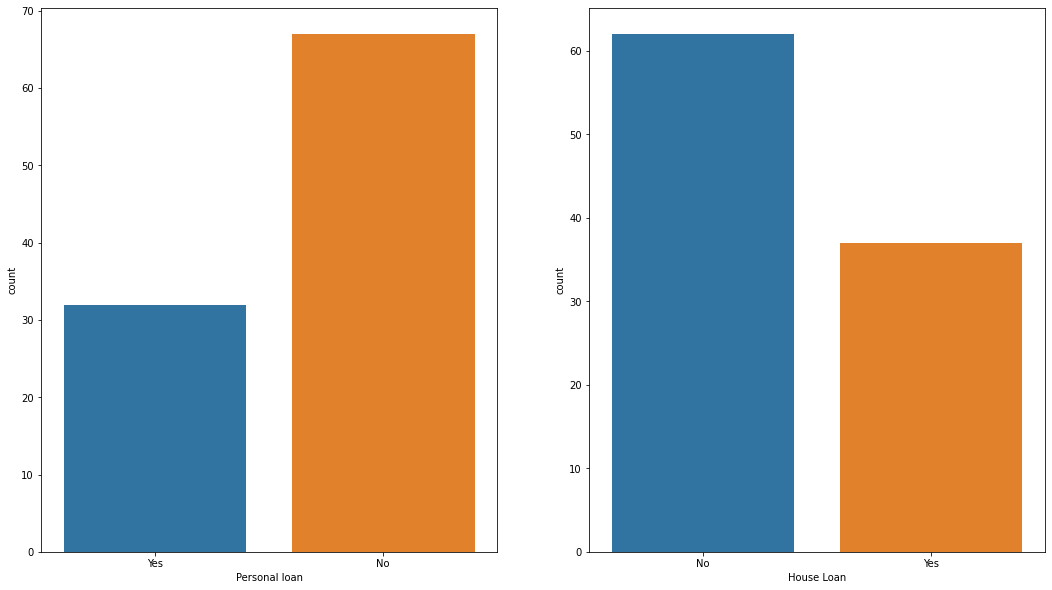

In [ ]:
fig,(ax1,ax2)=plt.subplots(figsize=(18,10),ncols=2)
sns.countplot(data=bb,x='Personal loan',ax=ax1)
sns.countplot(data=bb,x='House Loan',ax=ax2)

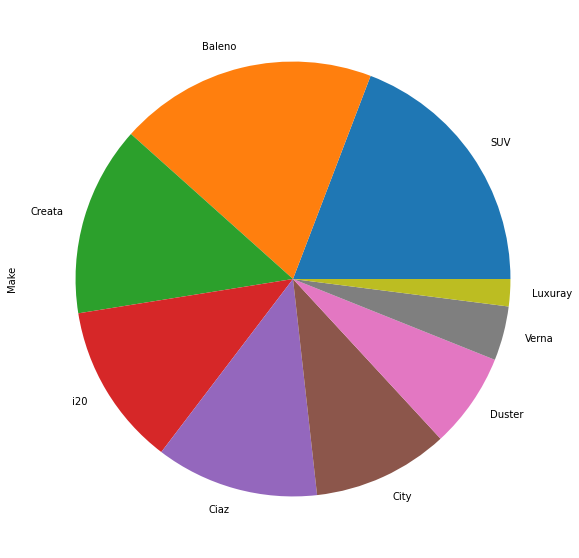

In [ ]:
plt.subplots(figsize=(12,10))
bb.Make.value_counts().plot.pie()

<AxesSubplot:xlabel='Price', ylabel='Count'>

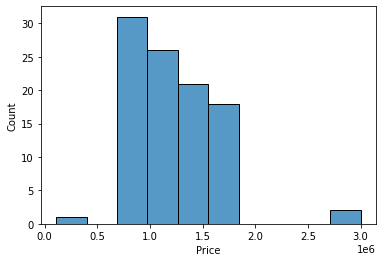

In [ ]:
sns.histplot(bb['Price'])

In [18]:
bb.columns
cols=['Age','No of Dependents','Salary','Total Salary','Price']
bb2 = bb[cols]

In [ ]:
bb2.head()

,Age,No of Dependents,Salary,Total Salary,Price
0,27,0,800000,800000,800000
1,35,2,1400000,2000000,1000000
2,45,4,1800000,1800000,1200000
3,41,3,1600000,2200000,1200000
4,31,2,1800000,2600000,1600000


<AxesSubplot:>

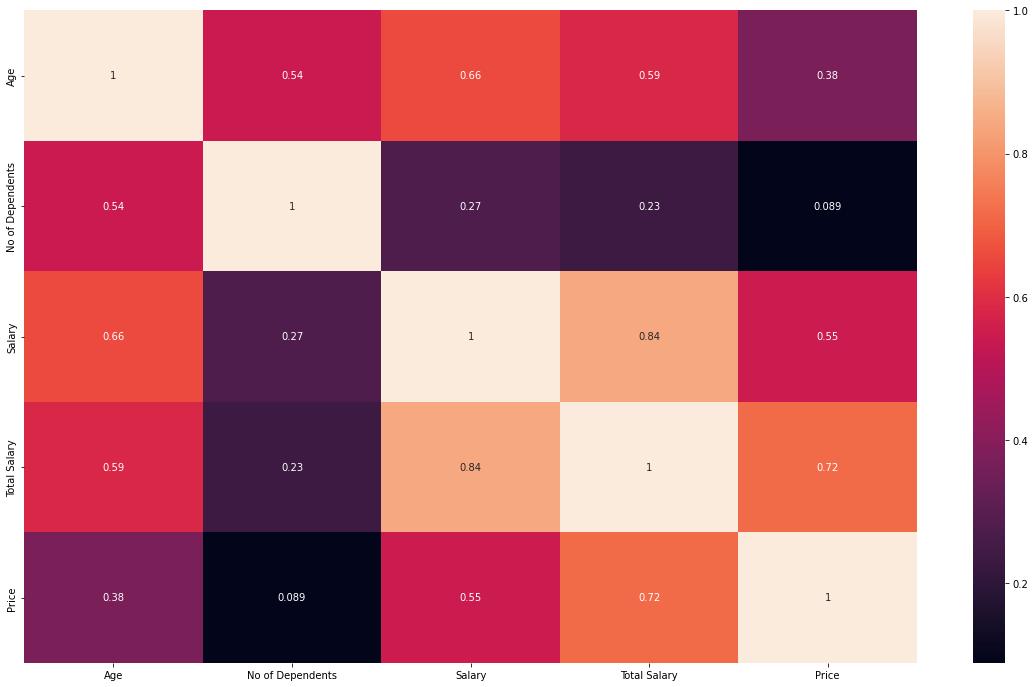

In [19]:
plt.subplots(figsize=(20,12))
sns.heatmap(data=bb2.corr(),annot=True)

In [ ]:
#find the optimum number of clusters

def num_of_k(k, data):
    cluster_values = list(range(1,k))
    inertia_values = []
    for c in cluster_values:
        model = KMeans(
            n_clusters = c,
            init = 'k-means++',
            max_iter = 500,
            random_state = 42)
        model.fit(data)
        inertia_values.append(model.inertia_)
        
    return inertia_values

In [ ]:
results = num_of_k(10,bb2)

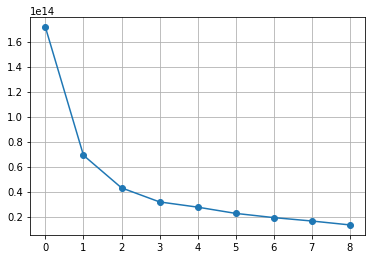

In [ ]:
plt.grid()
plt.plot(results, marker='o')

In [ ]:
# create clustering model with optimal k=3
updated_kmeans_model = KMeans(n_clusters = 3, 
                              init='k-means++', 
                              max_iter=500, )
updated_kmeans_model.fit_predict(bb2)

array([2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
bb2['cluster'] = updated_kmeans_model.labels_
bb['cluster'] = updated_kmeans_model.labels_

In [ ]:
import plotly.express as px
# visualize customer segments with a 3D plot
fig = px.scatter_3d(bb2,
                    x="Age",
                    y="No of Dependents",
                    z="Total Salary",
                    color='cluster',
                    hover_data=["Age",
                                "No of Dependents",
                                "Total Salary"],
                    category_orders = {"cluster": 
                                       ["0", "1", "2"]}
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


<AxesSubplot:xlabel='cluster', ylabel='count'>

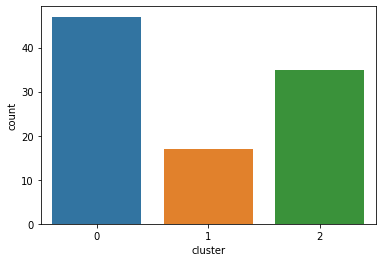

In [ ]:
sns.countplot(data=bb2,x='cluster')

<AxesSubplot:xlabel='cluster', ylabel='Total Salary'>

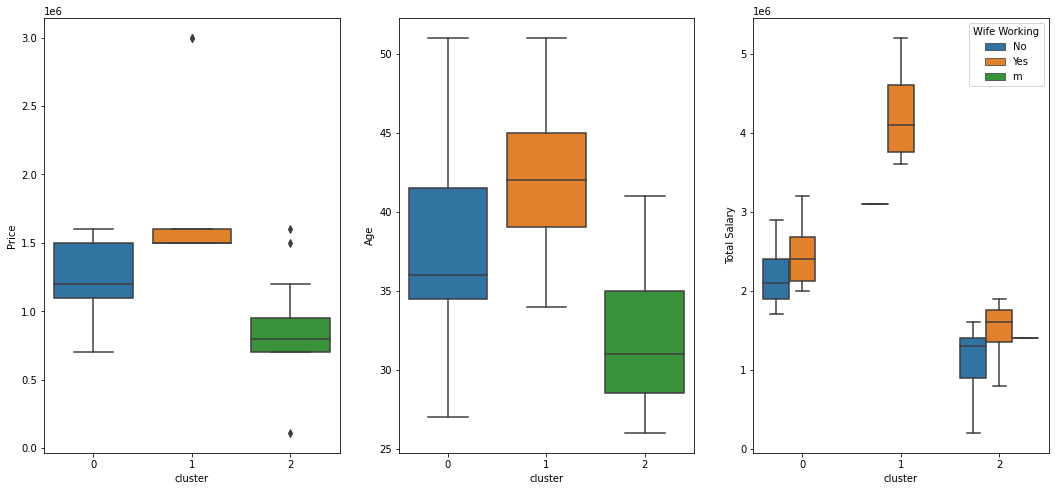

In [ ]:
fig,(ax3,ax4,ax50)=plt.subplots(ncols=3,figsize=(18,8))
sns.boxplot(data=bb2,x='cluster',y='Price',ax=ax3)
sns.boxplot(data=bb2,x='cluster',y='Age',ax=ax4)
sns.boxplot(data=bb,x='cluster',y='Total Salary',hue='Wife Working',ax=ax50)

SUV       12
Ciaz       9
Duster     7
City       6
Creata     4
Baleno     4
Verna      3
i20        2
Name: Make, dtype: int64


<AxesSubplot:xlabel='No of Dependents', ylabel='count'>

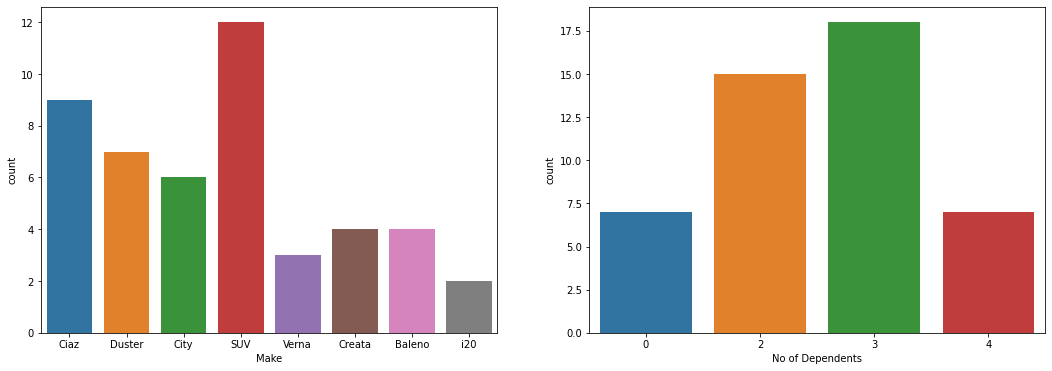

In [ ]:
fig,(ax5,ax6)=plt.subplots(ncols=2,figsize=(18,6))
print(bb[bb2.cluster==0].Make.value_counts())
sns.countplot(data=bb[bb2.cluster==0],x='Make',ax=ax5)
sns.countplot(data=bb[bb2.cluster==0],x='No of Dependents',ax=ax6)

As we can see there's a group of majority people with age 34-42(mean 33) involved in buying cars of price rannge 11-15Lac(mean 12Lac)

These group is mostly buying SUV,ciaz and Duster for the number of dependents generally 2,3.

Creata     9
SUV        6
Luxuray    2
Name: Make, dtype: int64


<AxesSubplot:xlabel='No of Dependents', ylabel='count'>

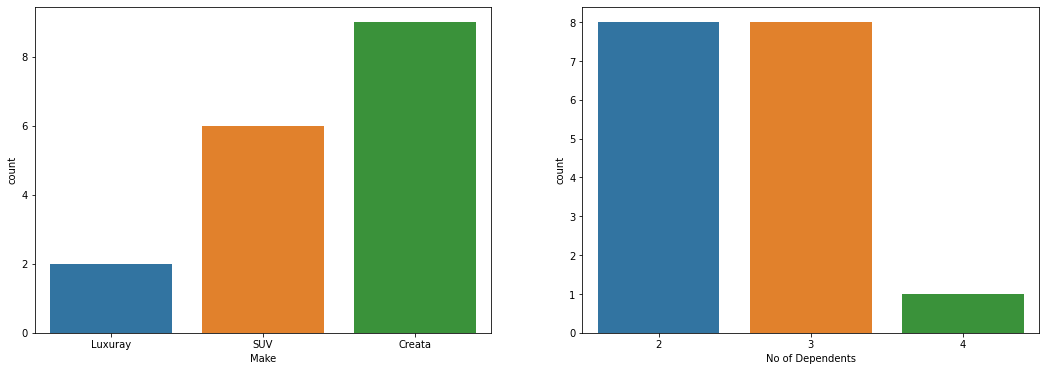

In [ ]:
fig,(ax7,ax8)=plt.subplots(ncols=2,figsize=(18,6))
print(bb[bb2.cluster==1].Make.value_counts())
sns.countplot(data=bb[bb2.cluster==1],x='Make',ax=ax7)
sns.countplot(data=bb[bb2.cluster==1],x='No of Dependents',ax=ax8)

In [ ]:
bb[bb2.cluster==1].head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster
15,49,Salaried,Married,Post Graduate,4,No,No,Yes,2500000,2000000,4500000,Luxuray,3000000,1
35,42,Salaried,Married,Post Graduate,3,No,No,Yes,2400000,1300000,3700000,SUV,1600000,1
45,34,Salaried,Married,Graduate,3,No,Yes,Yes,2200000,1400000,3600000,Creata,1500000,1
51,49,Salaried,Married,Post Graduate,3,No,No,Yes,2500000,1800000,4300000,SUV,1600000,1
53,44,Business,Married,Post Graduate,3,No,No,Yes,2000000,1800000,3800000,Creata,1500000,1


As we can see there's a group of less people with age 38-46(mean 42) involved in buying cars of price rannge 15-18Lac(mean 12Lac) with outliers of 30Lac.

These group is mostly buying creata,SUV and Luxuray for the number of dependents generally 2,3.

Most of these people have working wife hence high total salary.

Baleno    15
i20       10
City       4
Ciaz       3
Verna      1
SUV        1
Creata     1
Name: Make, dtype: int64


<AxesSubplot:xlabel='No of Dependents', ylabel='count'>

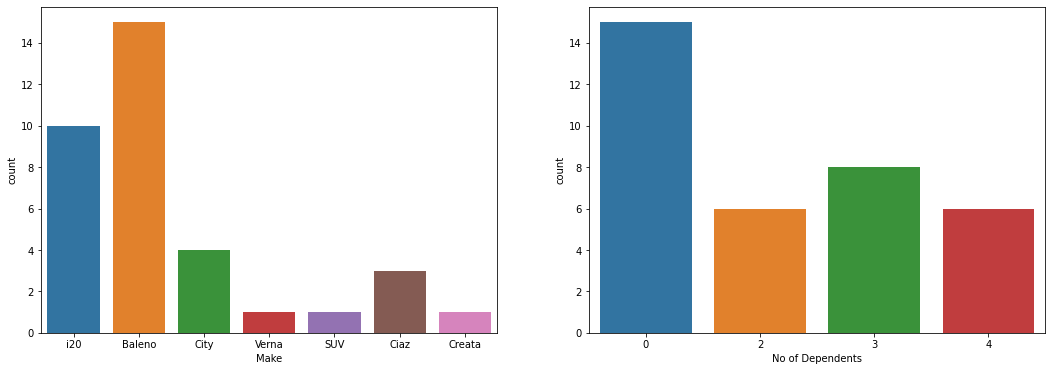

In [ ]:
fig,(ax9,ax10)=plt.subplots(ncols=2,figsize=(18,6))
print(bb[bb2.cluster==2].Make.value_counts())
sns.countplot(data=bb[bb2.cluster==2],x='Make',ax=ax9)
sns.countplot(data=bb[bb2.cluster==2],x='No of Dependents',ax=ax10)

This is a group of people with majorly no dependents and total salary of 
0.8-2Lacs.

these people are buying i20 and Baleno majorly.
 this are supposed to be middle class population wuith some of the number of dependents. 

<AxesSubplot:xlabel='cluster', ylabel='Total Salary'>

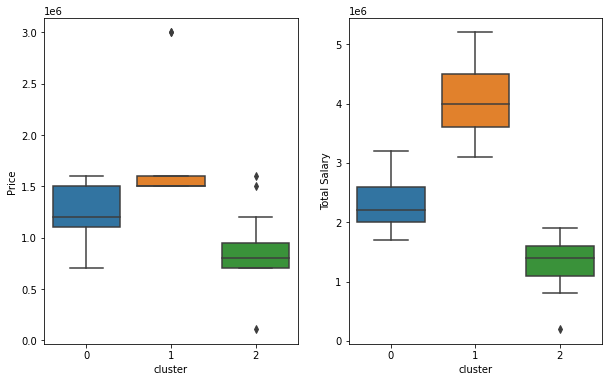

In [ ]:
fig,(ax3,ax4)=plt.subplots(ncols=2,figsize=(10,6))
sns.boxplot(data=bb2,x='cluster',y='Price',ax=ax3)
sns.boxplot(data=bb2,x='cluster',y='Total Salary',ax=ax4)

Correlating this data of cars with EV cars to visualise which EV will be owned by which group of people to create a precise market mix.**bold text**

---



---




**Next task is to correlate data of cars with EV for the specification and prices of them.**


---



---


In [6]:
ev= pd.read_csv('/content/drive/MyDrive/DS-ML/EV_market segmentation/EVIndia.csv')

In [7]:
ev.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


In [17]:
ev.PriceRange

0      ₹ 13.99 - 17.4 L
1     ₹ 12.49 - 13.64 L
2     ₹ 17.74 - 19.24 L
3     ₹ 21.99 - 25.88 L
4     ₹ 23.79 - 23.98 L
5      ₹ 1.06 - 1.12 Cr
6              ₹ 1.8 Cr
7             ₹ 29.15 L
8                ₹ 1 Cr
9             ₹ 1.16 Cr
10             ₹ 1.5 Cr
11     ₹ 1.01 - 1.19 Cr
Name: PriceRange, dtype: object

In [14]:
print(bb.Make.value_counts())
bb.Price[bb.Make.value_counts()]

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64


19     700000
19     700000
14     700000
12     110000
12     110000
10    1600000
7      700000
4     1600000
2     1200000
Name: Price, dtype: int64

In [ ]:
bb['House Loan'] = bb['House Loan'].map({'Yes':1,'No':0})
bb['Personal loan'] = bb['Personal loan'].map({'Yes':1,'No':0})
bb['Wife Working'] = bb['Wife Working'].map({'Yes':1,'No':0})
bb['Education'] = bb['Education'].map({'Post Graduate':1,'Graduate':2})
bb['Marrital Status'] = bb['Marrital Status'].map({'Single':0,'Married':1})
bb['Profession']=bb['Profession'].map({'Salaried':1,'Business':2})

In [ ]:
bb

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,0,1,0,1,0,0.0,800000,0,800000,i20,800000
1,35,1,1,1,2,1,1,1.0,1400000,600000,2000000,Ciaz,1000000
2,45,2,1,2,4,1,1,0.0,1800000,0,1800000,Duster,1200000
3,41,2,1,1,3,0,0,1.0,1600000,600000,2200000,City,1200000
4,31,1,1,1,2,1,0,1.0,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,2,0,2,0,0,0,0.0,2400000,0,2400000,SUV,1600000
95,50,1,1,1,3,0,0,1.0,3800000,1300000,5100000,SUV,1600000
96,51,2,1,2,2,1,1,0.0,2200000,0,2200000,Ciaz,1100000
97,51,1,1,1,2,0,0,1.0,2700000,1300000,4000000,Creata,1500000
